<a href="https://colab.research.google.com/github/Abhi-3026/AI_ML_AVEN/blob/main/Linear_Reg_ALG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR REGRESSION USING SINGLE VARIABLE

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv("/content/homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


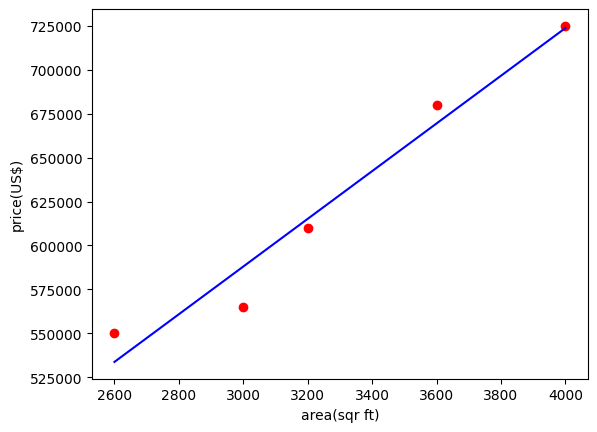

In [ ]:
reg = LinearRegression()
reg.fit(df[['area']], df.price)


%matplotlib inline
plt.xlabel('area(sqr ft)')
plt.ylabel('price(US$)')
plt.scatter(df.area,df.price,color='red')
plt.plot(df.area,reg.predict(df[['area']]),color='blue')
plt.show()

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [ ]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [ ]:
reg.coef_

array([135.78767123])

In [ ]:
reg.intercept_

180616.43835616432

In [ ]:
#  y = m.x + c
135.78767123 * 3300 + 180616.4383561

628715.7534151

In [ ]:
d = pd.read_csv("/content/areas.csv")
d.head(3)

,area
0,1000
1,1500
2,2300


In [ ]:
p = reg.predict(d)

In [ ]:
d['prices']=p

In [ ]:
d

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
d.to_csv("prediction.csv")

LINEAR REGRESSION USING MULTIPLE VRAIBLES

In [ ]:
df = pd.read_csv("/content/homeprices (1).csv")
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms


4

In [ ]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [ ]:
reg.coef_

array([  112.06244194, 23388.88007794, -3231.71790863])

In [ ]:
reg.intercept_

221323.00186540396

In [ ]:
reg.predict([[3000,3,40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([498408.25158031])

In [ ]:
# y = m1x1 + m2x2 + m3x3 + c
112.06244194*3000 + 23388.88007794*3 + -3231.71790863*40 + 221323.0018654

498408.25157402

Gradient Descent

In [ ]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        md = -(2/n) * sum(x * (y - y_predicted))# m derivative
        bd = -(2/n) * sum(y - y_predicted)# b derivative
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, iteration {}".format(m_curr,b_curr,i))
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        print("cost {}".format(cost))

In [ ]:
x = np.array([1,2,3,4,5])
y = np.array([5,7,9,11,13])

In [ ]:
gradient_descent(x,y)

m 4.96, b 1.44, iteration 0
cost 89.0
m 0.4991999999999983, b 0.26879999999999993, iteration 1
cost 71.10560000000002
m 4.451584000000002, b 1.426176000000001, iteration 2
cost 56.8297702400001
m 0.892231679999997, b 0.5012275199999995, iteration 3
cost 45.43965675929613
m 4.041314713600002, b 1.432759910400001, iteration 4
cost 36.35088701894832
m 1.2008760606719973, b 0.7036872622079998, iteration 5
cost 29.097483330142282
m 3.7095643080294423, b 1.4546767911321612, iteration 6
cost 23.307872849944438
m 1.4424862661541864, b 0.881337636696883, iteration 7
cost 18.685758762535738
m 3.4406683721083144, b 1.4879302070713722, iteration 8
cost 14.994867596913156
m 1.6308855378034224, b 1.0383405553279617, iteration 9
cost 12.046787238456794
m 3.2221235247119777, b 1.5293810083298451, iteration 10
cost 9.691269350698109
m 1.7770832372205707, b 1.1780607551353204, iteration 11
cost 7.8084968312098315
m 3.0439475772474127, b 1.5765710804477953, iteration 12
cost 6.302918117062937
m 1.8898457

Gradient Desent example

In [ ]:
def predict_using_sklean():
    df = pd.read_csv("test_scores.csv")
    r = LinearRegression()
    r.fit(df[['math']],df.cs)
    return r.coef_, r.intercept_

In [ ]:
def gradient_descent(x,y):
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.08

    for i in range(iterations):
      return m_curr, b_curr

In [ ]:
df = pd.read_csv("test_scores.csv")
x = np.array(df.math)
y = np.array(df.cs)

In [ ]:
m, b = gradient_descent(x,y)
print("Using gradient descent function: Coef {} Intercept {}".format(m, b))

Using gradient descent function: Coef 0 Intercept 0


In [ ]:
m_sklearn, b_sklearn = predict_using_sklean()
print("Using sklearn: Coef {} Intercept {}".format(m_sklearn,b_sklearn))

Using sklearn: Coef [1.01773624] Intercept 1.9152193111569034


SAVE MODEL USING JOBLIB AND PICKLE

In [ ]:
import pickle

In [ ]:
model = LinearRegression()

with open('model_pickle','wb') as f:
  pickle.dump(model,f)

In [ ]:
with open('model_pickle','rb') as f:
    model = pickle.load(f)

In [ ]:
!pip install joblib
import joblib

In [ ]:
joblib.dump(model,'model_joblib')

['model_joblib']

In [ ]:
mj = joblib.load('model_joblib')

CATEGORICAL,DUMMY VARIABLES,ONE HOT ENCODING

In [ ]:
df = pd.read_csv("/content/homeprices (2).csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
dummies = pd.get_dummies(df.town)
dummies = dummies.astype(int)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [ ]:
merged = pd.concat([df,dummies],axis='columns')
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [ ]:
final = merged.drop(['town','west windsor'],axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
X = final.drop('price',axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [ ]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.predict([[2800,0,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [ ]:
model.predict([[3400,0,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [ ]:
model.score(X,y)

0.9573929037221872

In [ ]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfle = df
dfle.town = le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [ ]:
X = df[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [ ]:
y = df.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown= 'ignore')

In [ ]:
ohe.fit_transform(X).toarray()

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [ ]:
model.fit(X,y)

LinearRegression()

In [ ]:
model.predict([[1,2800]])

array([587143.58452138])

USING TRAIN AND TEST SPLIT METHOD

In [ ]:
df = pd.read_csv("/content/carprices.csv")
df
df.head()

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

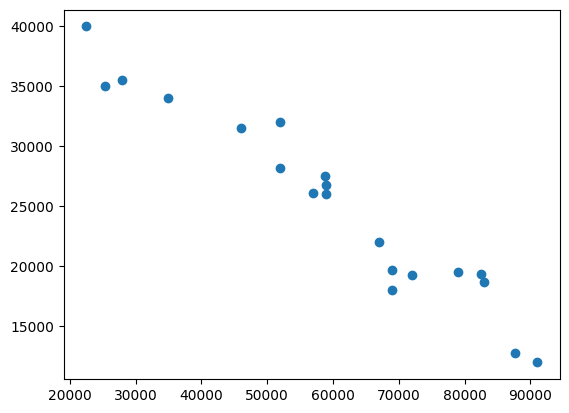

In [ ]:
# car mileage vs sell price
plt.scatter(df['Mileage'],df['Sell Price($)'])

In [ ]:
X = df[['Mileage','Age(yrs)']]
y = df['Sell Price($)']

In [ ]:
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train,X_test,y_train,y_test

(    Mileage  Age(yrs)
 9     67000         6
 14    82450         7
 3     22500         2
 17    69000         5
 12    59000         5
 13    58780         4
 1     35000         3
 0     69000         6
 10    83000         7
 4     46000         4
 16    28000         2
 6     52000         5
 18    87600         8
 2     57000         5
 11    79000         7
 8     91000         8,
     Mileage  Age(yrs)
 7     72000         6
 15    25400         3
 5     59000         5
 19    52000         5,
 9     22000
 14    19400
 3     40000
 17    19700
 12    26000
 13    27500
 1     34000
 0     18000
 10    18700
 4     31500
 16    35500
 6     32000
 18    12800
 2     26100
 11    19500
 8     12000
 Name: Sell Price($), dtype: int64,
 7     19300
 15    35000
 5     26750
 19    28200
 Name: Sell Price($), dtype: int64)

In [ ]:
X_train


,Mileage,Age(yrs)
9,67000,6
14,82450,7
3,22500,2
17,69000,5
12,59000,5
13,58780,4
1,35000,3
0,69000,6
10,83000,7
4,46000,4


In [ ]:
len(X_test)

4

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [ ]:
clf.fit(X_train,y_train)

LinearRegression()

In [ ]:
clf.predict(X_test)

array([20659.53370302, 38855.25426755, 25669.47234032, 28585.43715196])

In [ ]:
y_test

7     19300
15    35000
5     26750
19    28200
Name: Sell Price($), dtype: int64

In [ ]:
clf.score(X_test,y_test)

0.8550872390100894